# 🚗 Araba Fiyat Tahmin Projesi (Car Price Prediction)

## 📋 Proje Özeti
Bu proje, makine öğrenmesi algoritmaları kullanarak arabaların fiyatlarını tahmin etmeyi amaçlamaktadır. Projede **CatBoost**, **Stacking Regressor**, **Voting Regressor**, **Extra Trees**, **XGBoost**, **LightGBM**, **Gradient Boosting**, **MLP**, **SVR**, **Ridge Regression**, **Elastic Net**, **Lasso Regression**, **Deep Neural Network**, **Linear Regression** ve **Random Forest** modelleri karşılaştırılmış ve en iyi performans gösteren model seçilmiştir.

### 🎯 Hedefler:
- Araba özelliklerinden fiyat tahmini yapma
- Farklı ML algoritmalarını karşılaştırma
- Model performansını optimize etme
- En iyi modeli kaydetme

### 📊 Kullanılan Veri Seti:
- **Kaynak**: Car_Raw_Data.csv
- **Hedef Değişken**: Araba Fiyatı (Price)
- **Özellikler**: Marka, Model, Yıl, Motor Hacmi, Kilometre, vb.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning kütüphaneleri
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import joblib

# Gradient Boosting kütüphaneleri
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Deep Learning kütüphaneleriİ
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
sns.set()

## 📚 1. Kütüphanelerin İçe Aktarılması
Gerekli Python kütüphanelerini içe aktarıyoruz.

In [3]:
car_raw = pd.read_csv('Car_Raw_Data.csv')
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## 📂 2. Veri Setinin Yüklenmesi
Ham veri setini yüklüyoruz ve ilk 5 satırına bakıyoruz.

### Ham veriyi önişleme

In [4]:
car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
car_raw.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## 🔧 3. Veri Ön İşleme (Data Preprocessing)
### 3.1 Veri Setinin Genel Bilgileri

In [6]:
car_raw.drop("Model", axis=1, inplace=True)
car_raw.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Model sütununu kaldırıyoruz (çok fazla benzersiz değer içeriyor ve ilk analizde kullanmayacağız).

### Ham verideki eksik değerleri tespit etme

In [7]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
car_raw.dropna(inplace=True)
car_raw.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

Eksik değerleri içeren satırları kaldırdık. Artık veri setinde eksik değer bulunmuyor.

### Olasılık Dağılımlarını Keşfetme

### 3.2 Eksik Değerlerin Tespit Edilmesi ve Temizlenmesi

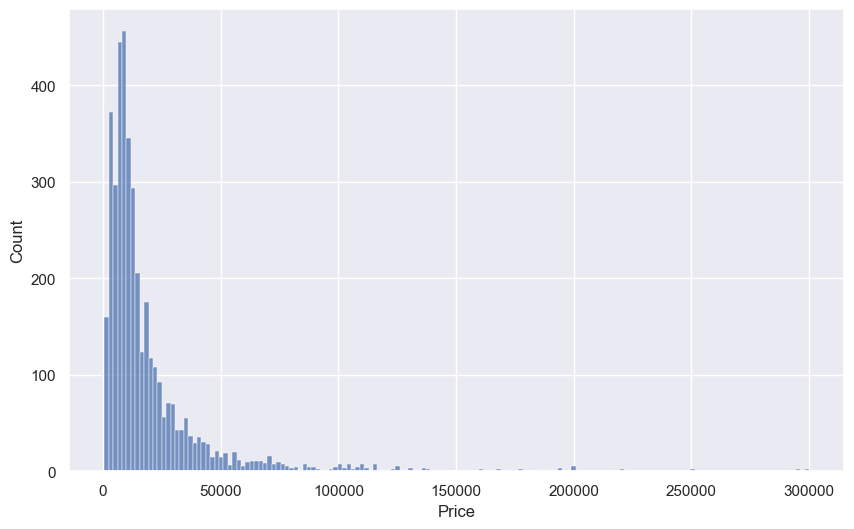

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(car_raw['Price'])
plt.show()

Veri seti içinde yer alan fiyat aralığını kontrol ettiğimizde değerlerin bir düzene göre sıralandığını görüyoruz. Ancak düzene uymayan bazı değerler mevcut bunun için quantile(0.99) ile %1'ini kaldırıyoruz

In [10]:
q = car_raw['Price'].quantile(0.99)
q

129812.51999999981

burda tespit edilen değerin üzerindeki verileri kullanmayı tercih etmiyoruz

## 📊 4. Keşifsel Veri Analizi (Exploratory Data Analysis)
### 4.1 Fiyat Dağılımının İncelenmesi

In [11]:
car_1 = car_raw[car_raw['Price'] < q]
car_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Text(0.5, 1.0, 'Aykırı değerler dahil edildiğinde')

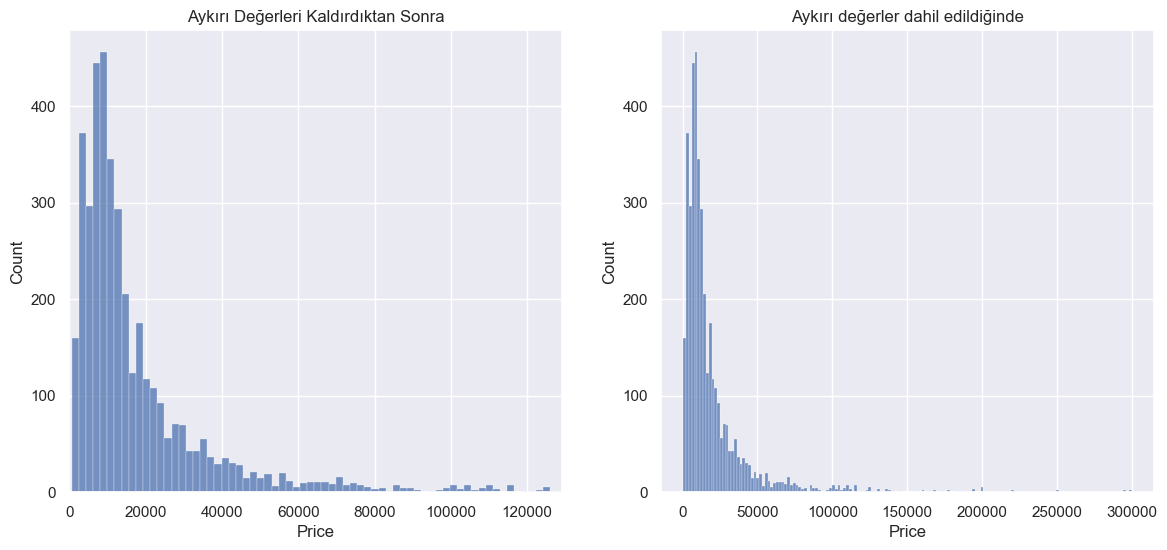

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(car_raw['Price']) 
plt.title('Aykırı Değerleri Kaldırdıktan Sonra') 
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.histplot(car_raw['Price']) 
plt.title('Aykırı değerler dahil edildiğinde') 

### 4.2 Aykırı Değerlerin Analizi

Veri seti içinde yer alan fiyat aralığını kontrol ettiğimizde değerlerin bir düzene göre sıralandığını görüyoruz. Ancak düzene uymayan bazı değerler mevcut. Bunun için **quantile(0.99)** ile %1'ini kaldırıyoruz.


In [13]:
q = car_1['Mileage'].quantile(0.99)
car_2 = car_1[car_1['Mileage'] < q]

Burada gerçekleştirdiğimiz işlem sayesinde ortalamanın anormal üstündeki verilerden kurtulmuş oluyoruz. Benzer işlemler Katedilen mesafe, motor hacmi ve yıl için de geçerli olabilir.

<Axes: xlabel='Year', ylabel='Count'>

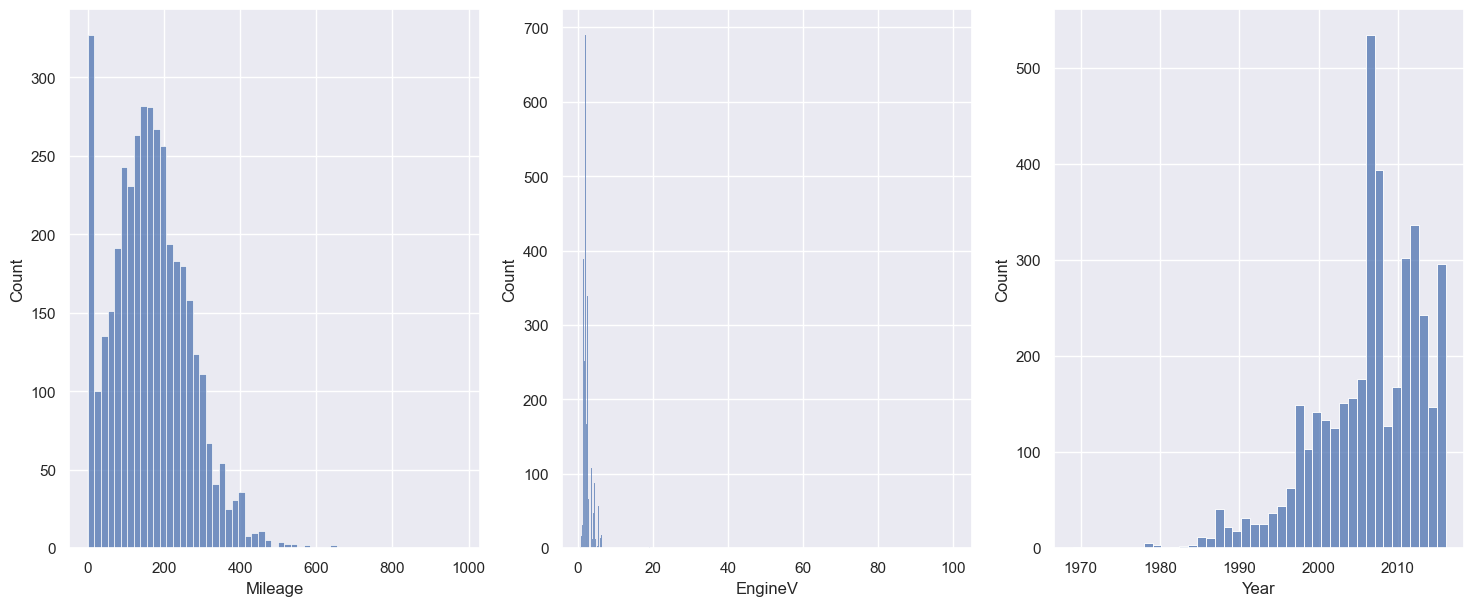

In [14]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(car_1['Mileage']) 

plt.subplot(1,3,2)
sns.histplot(car_raw['EngineV'])

plt.subplot(1,3,3)
sns.histplot(car_raw['Year']) 

# Bu tespit edilen değerin üzerindeki verileri kullanmayı tercih etmiyoruz (aykırı değerler).

Benzer Problemi burada da gözlemliyoruz. Mesafe ve Motor hacminde ortalamanın çok üstünde olanlar ve yıl olarak aşırı eski araçlar veride sapmalara neden oluyor. Benzer çözüm deneyerek bu sorunu da aşmaya çalışıyoruz.

### Katedilen Mesafe

In [15]:
q = car_1["Mileage"].quantile(0.99)
car_2 = car_1[car_1["Mileage"] < q]

### 4.3 Diğer Değişkenler İçin Aykırı Değer Analizi

Burada gerçekleştirdiğimiz işlem sayesinde ortalamanın anormal üstündeki verilerden kurtulmuş oluyoruz. Benzer işlemler **Katedilen mesafe, motor hacmi ve yıl** için de geçerli olabilir.


Text(0.5, 1.0, 'Aykırı Değerleri Kaldırdıktan Sonra')

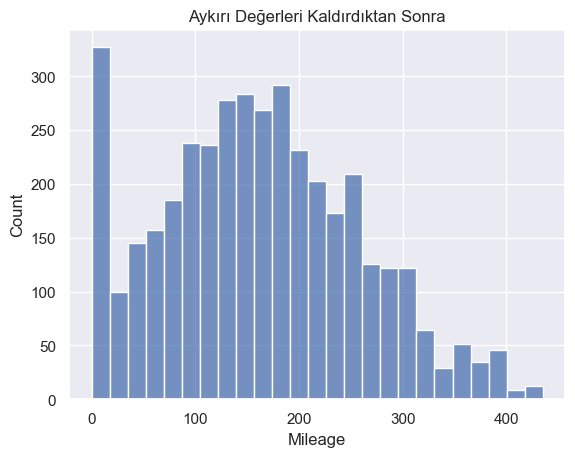

In [16]:
sns.histplot(car_2['Mileage']) 
plt.title('Aykırı Değerleri Kaldırdıktan Sonra') 

### Motor Hacmi

Benzer problemi burada da gözlemliyoruz:
- **Mesafe**: Ortalamanın çok üstünde değerler
- **Motor hacmi**: Aşırı yüksek motor hacimleri
- **Yıl**: Aşırı eski araçlar

Bu sapmalara neden olan değerleri temizleyeceğiz.


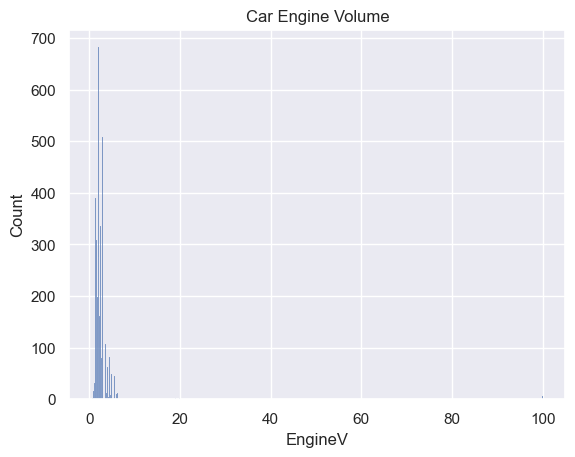

In [17]:
sns.histplot(car_2['EngineV']) 
plt.title('Car Engine Volume') 

print('Benzer problemi burada da gözlemliyoruz:')
print('- **Mesafe**: Ortalamanın çok üstünde değerler')
print('- **Motor hacmi**: Aşırı yüksek motor hacimleri')
print('- **Yıl**: Aşırı eski araçlar\n')
print('Bu sapmalara neden olan değerleri temizleyeceğiz.')

Text(0.5, 1.0, 'Mantıklı aralıkta motor hacim değerleri')

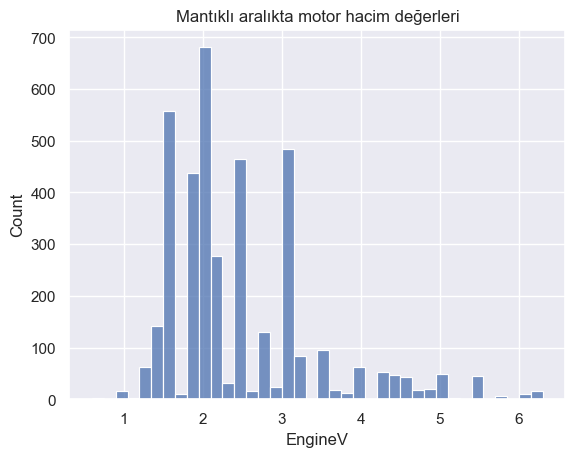

In [18]:
car_3 = car_2[car_2['EngineV']<6.5]
sns.histplot(car_3['EngineV'])
plt.title('Mantıklı aralıkta motor hacim değerleri')

### 4.4 Kilometre (Mileage) Aykırı Değerlerinin Temizlenmesi

### Yıl

Text(0.5, 1.0, 'Yıl')

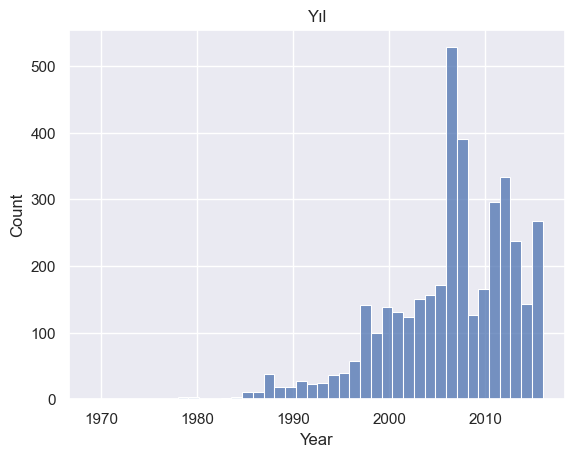

In [19]:
sns.histplot(car_3['Year']) 
plt.title('Yıl') 

Text(0.5, 1.0, 'Eski yılları sildikten sonra Yıl Değerleri')

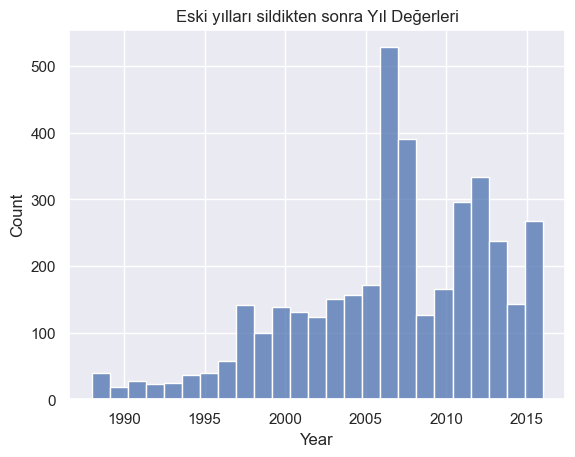

In [20]:
q = car_3['Year'].quantile(0.01)
car_4 = car_3[car_3['Year']>q]

sns.histplot(car_4['Year'])
plt.title('Eski yılları sildikten sonra Yıl Değerleri')

### 4.5 Motor Hacmi (Engine Volume) Aykırı Değerlerinin Temizlenmesi

In [21]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


yaptığımız işlemler sonucunda indexlerde kaymalar yaşandı. veri setinde 3867 veri bulunurken 4344 index yer alıyor.

In [22]:
car_clean = car_4.reset_index(drop=True)

car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


### 4.6 Yıl (Year) Aykırı Değerlerinin Temizlenmesi

In [23]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [24]:
car_raw.shape[0] -  car_clean.shape[0]

158

veri setinin ilk hali ile temizlenmiş hali arasında başta sildiğimiz null değerler haricinde 158 veri daha kaldırmışız.
silinen 172 null verisini de dahil edersek toplam 330 adet datayı kaybettik

In [25]:
car_clean.to_csv('Car_cleaned.csv', index=False)

### 4.7 Veri Seti İndekslerinin Düzenlenmesi

Yaptığımız temizlik işlemleri sonucunda indexlerde kaymalar yaşandı. Veri setinde **3867 veri** bulunurken **4344 index** yer alıyor. Bu durumu düzeltelim.

Temizlenmiş veri setini kaydetiyoruz.

Temizlik işlemleri sonrasında dahmin için öncelikle Lineer Regresyon kullanmayı deniyoruz.

Lineer Regresyonun amacı iki değişken arasındaki ilişkinin doğrusal olup olmadığını tahmin etmektir.

In [26]:
car = pd.read_csv('Car_cleaned.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


numerik 3 sütunu inceleyelim

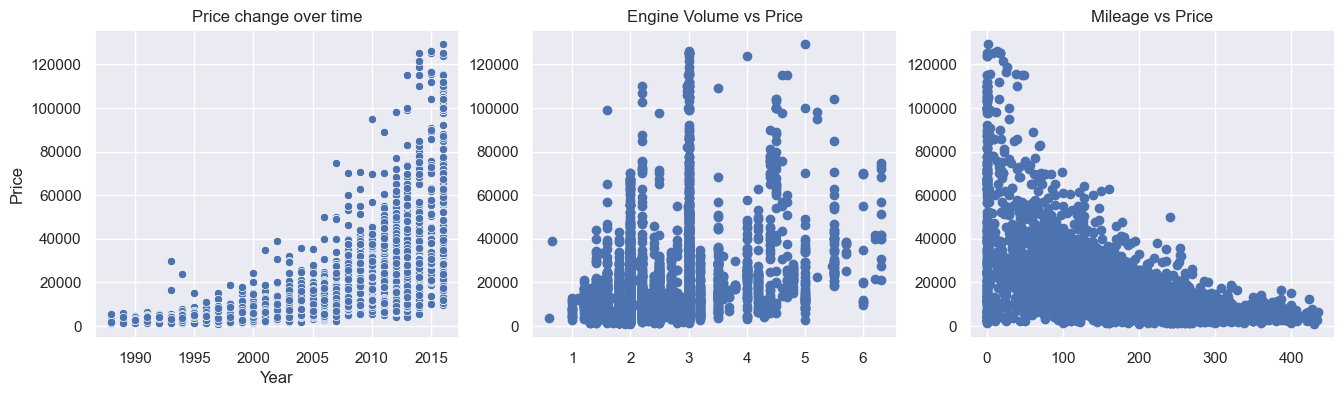

In [27]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=car["Year"], y=car["Price"])
plt.title("Price change over time")
plt.subplot(1,3,2)
plt.scatter(x=car["EngineV"], y=car["Price"])
plt.title("Engine Volume vs Price")
plt.subplot(1,3,3)
plt.scatter(x=car["Mileage"], y=car["Price"])
plt.title("Mileage vs Price")
plt.show()

### 4.8 Temizlik İşlemi Sonuç Analizi

📈 **Veri Kaybı Analizi:**
- Aykırı değer temizliği: **158 veri**
- Null değer temizliği: **172 veri**
- **Toplam kayıp**: 330 veri

Bu kayıp, veri kalitesini artırmak için kabul edilebilir düzeydedir.

ilişki doğrusal olmadığını gözlemledik. Bu yüzden Lineer Regresyon kullanımına uygun olmadığını tespit ediyoruz

Text(0.5, 1.0, 'Price')

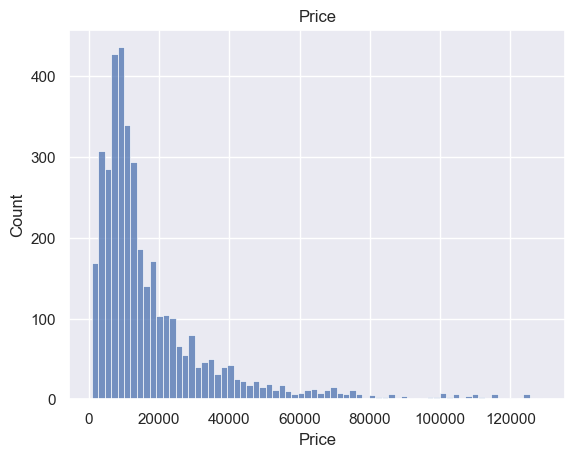

In [28]:
sns.histplot(car['Price']) 
plt.title('Price')

Burda temel sorun fiyat parametresinden kaynaklanıyor. Sahip olduğumuz fiyat verisi doğrusal değil.

Veriyi dönüştürmek için log dönüşümü deniyoruz

## 🤖 5. Model Geliştirme - Linear Regression

### 5.1 Linear Regression Yaklaşımı

Temizlik işlemleri sonrasında tahmin için öncelikle **Linear Regression** kullanmayı deniyoruz.

**Linear Regression'ın Amacı**: İki değişken arasındaki ilişkinin doğrusal olup olmadığını tahmin etmektir.

In [29]:
log_price = np.log(car['Price'])
car['log_price'] = log_price

car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


### 5.2 Numerik Değişkenlerin İncelenmesi

3 ana numerik sütunu inceleyelim ve fiyatla olan ilişkilerini görelim.

Text(0.5, 1.0, 'Mileage Vs log_price')

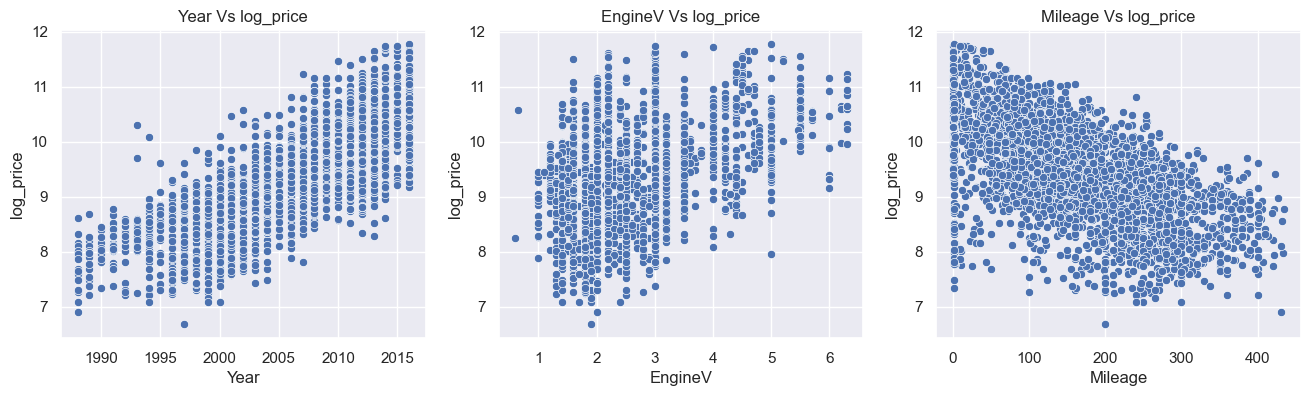

In [30]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price']) 
plt.title('Year Vs log_price') 

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price']) 
plt.title('EngineV Vs log_price') 

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price']) 
plt.title('Mileage Vs log_price') 

log dönüşümü sonrası verilerin doğrusallığını gözlemleyebiliyoruz.

In [31]:
car.drop('Price', axis=1, inplace=True)

### 5.3 Doğrusallık Analizi Sonucu

❌ **Sonuç**: İlişki doğrusal olmadığını gözlemledik. Bu yüzden Linear Regression kullanımına **uygun olmadığını** tespit ediyoruz.

orijinal fiyat tablosuna ihtiyacımız kalmadığı için kaldırabiliriz.

Şimdi sıra çoklu doğrusallığı kontrol etmeye geldi

### 5.4 Veri Dönüşümü - Log Transformation

Burada temel sorun **fiyat parametresinden** kaynaklanıyor. Sahip olduğumuz fiyat verisi doğrusal değil.

**Çözüm**: Veriyi dönüştürmek için **log dönüşümü** deniyoruz.

In [32]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

Burada, arabanın daha yeni olması kilometre değerinin daha düşük olacağı gibi varsayılabilecek verilerde bazı çoklu doğrusallık olabilir. bu nedenle Yıl ve Kilometre birbiriyle ilişkili olacaktır

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

var = car[['Mileage','Year', 'EngineV']]
vif_df = pd.DataFrame()

vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['Features'] = var.columns
vif_df

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


### 5.5 Log Dönüşümü Sonucu

✅ **Başarılı!** Log dönüşümü sonrası verilerin **doğrusallığını** gözlemleyebiliyoruz.

Sonuç 1 olduğunda, bu çoklu bağlantı bulunmadığı anlamına gelir, bu aynı zamanda ölçünün minimum değeridir. ancak bunun bir üst sınırı yoktur.

Genel olarak değerler 1 ila 5 arasında veya 1 < VIF < 5 arasında kabul edilebilir olmakla birlikte, mevcut soruna ve yazılımcıya bağlıdır. geçmiş deneyimlerinden yola çıkarak kesme değerine karar verecektir

Elde ettiğimiz sonuça göre, Yıl sütunu diğer sütunlarla çok fazla ilişkili gibi görünüyor. ve diğer özellik değerlerini de etkilemektedir. yıl değerini çıkarmak iyi olabilir.

In [34]:
car.drop('Year', axis=1, inplace=True)
car.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


Sıra kategorik sütunlara geliyor

### 5.6 Çoklu Doğrusallık (Multicollinearity) Kontrolü

In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 211.6+ KB


Bunun için pandas .get_dummies() metodunu tercih ediyoruz, tüm kategorik değerler için yeni bir sütun oluşturacak, verilerin boyutunu artıracaktır.

**Beklenen İlişkiler:**
- Arabanın daha **yeni** olması → **kilometre** değerinin daha düşük olması
- Bu nedenle **Yıl** ve **Kilometre** birbiriyle ilişkili olacaktır

**VIF (Variance Inflation Factor)** ile kontrol edelim.

In [36]:
car_dum = pd.get_dummies(car, drop_first=True)
car_dum = car_dum.astype(float)
car_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427.0,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358.0,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240.0,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120.0,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163.0,2.5,9.350102,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,35.0,1.6,9.792556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,9.0,3.0,11.736069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,1.0,3.5,8.779557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Çoklu bağlantı durumu kontrol

### 5.7 VIF Analiz Sonuçları

**VIF Değer Yorumları:**
- **VIF = 1**: Çoklu bağlantı yok (minimum değer)
- **1 < VIF < 5**: Kabul edilebilir
- **VIF > 5**: Çoklu bağlantı sorunu

**Sonuç**: Yıl sütunu diğer sütunlarla çok fazla ilişkili görünüyor ve diğer özellik değerlerini etkilemektedir. **Yıl değerini çıkarmak** iyi olabilir.

In [37]:
vif_df_all = pd.DataFrame()

vif_df_all['VIF'] = [vif(car_dum.values, i) for i in range(car_dum.shape[1])]
vif_df_all['Features'] = car_dum.columns

vif_df_all

,VIF,Features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


Elde ettiğimiz sonuç olumlu. tüm değerler 5'in altında ancak log_price yani hedef sütunumuz 42 VIF değerine sahip, bu da bize fiyatın diğer sütunlarla yüksek oranda ilişkili olduğunu söylüyor

### 5.8 Kategorik Değişkenlerin İşlenmesi

In [38]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [39]:
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

car_pos = car_dum[col]
car_pos

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163.0,2.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,9.792556,35.0,1.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,11.736069,9.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,8.779557,1.0,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


**Pandas get_dummies() Metodu:**
- Tüm kategorik değerler için yeni sütun oluşturacak
- Verilerin boyutunu artıracak
- Her kategori için 0/1 değerleri içerecek

In [40]:
car_pos.to_csv('Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


### 5.11 Ön İşlenmiş Verinin Kaydedilmesi

Linear Regression için hazırlanmış veriyi kaydediyoruz.

In [41]:
car = pd.read_csv('Car_preproccesed.csv')
car.head()

### 5.9 Final Çoklu Bağlantı Durumu Kontrolü

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# **Linear Reg**

In [42]:
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))


### 5.10 VIF Sonuçları - Final

✅ **Olumlu Sonuç**: Tüm değerler 5'in altında

⚠️ **Not**: log_price (hedef sütun) **42 VIF** değerine sahip. Bu bize fiyatın diğer sütunlarla **yüksek oranda ilişkili** olduğunu söylüyor (bu normal ve beklenen bir durum).

Verilerin ölçeklendirilmesi
Not: Dummy variable'ı ölçeklendirmek her zaman en iyi uygulama olarak kabul edilmez. Çünkü ölçeklendirildiklerinde tüm bilgileri kaybederler. ancak burada bunu göz ardı ediyoruz ve her sütunun ayrı özellikler olduğunu düşünüyoruz.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [44]:
X_scaled[0]

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

Dummy değerlerde yer alan 1 ve 0'lar artık yok

#### Train_test_split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

## 🎯 6. Linear Regression Model Eğitimi

### 6.1 Veri Hazırlığı

((3093, 17), (3093,), (774, 17), (774,))

#### Regresyon oluşturma

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 6.2 Veri Ölçeklendirme (Feature Scaling)

**⚠️ Not**: Dummy variable'ları ölçeklendirmek her zaman en iyi uygulama olarak kabul edilmez. Çünkü ölçeklendirildiklerinde tüm bilgileri kaybederler. Ancak burada bunu göz ardı ediyoruz ve her sütunun ayrı özellikler olduğunu düşünüyoruz.

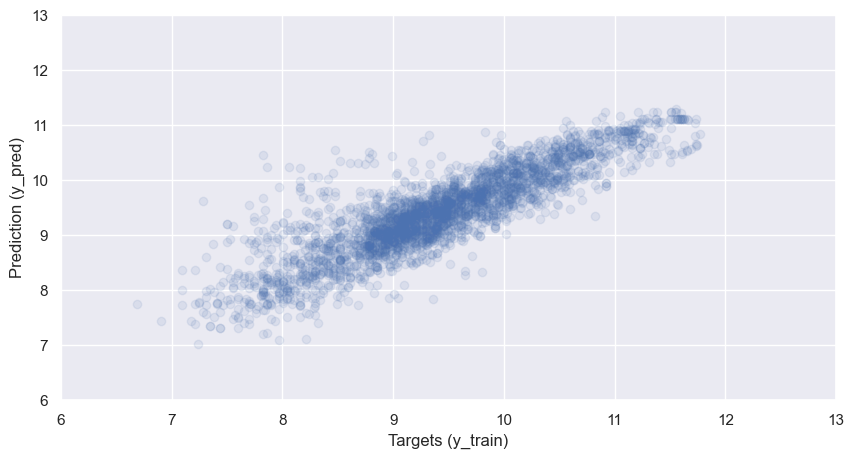

In [47]:
# Temel Lineer regresyon modelininin değerlendirmesi
y_pred_train = lr.predict(X_train)
plt.figure(figsize=(10,5))
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Eğitim tahmini iyi görünüyor, tamamen rastgele değil, grafikte doğrusallığı gözlemlenebiliyor

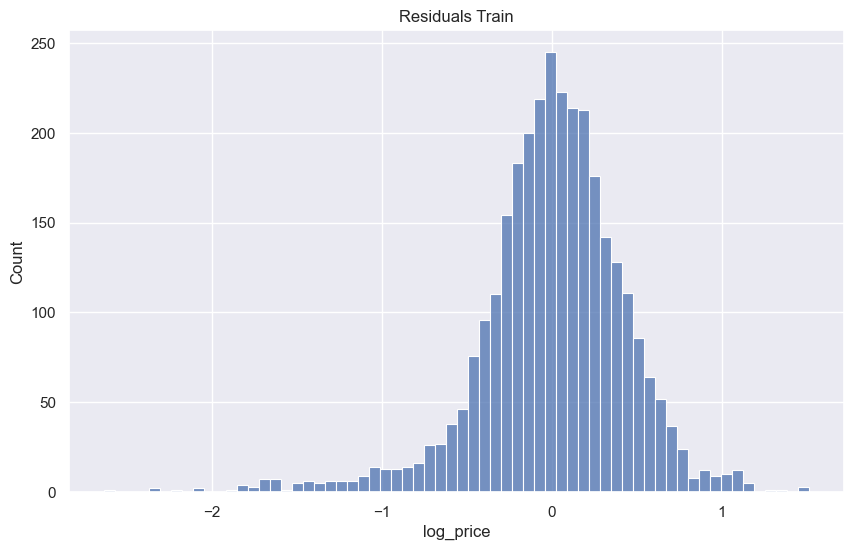

In [48]:
residuals_train = (y_train - y_pred_train)

plt.figure(figsize=(10,6))
sns.histplot(residuals_train)
plt.title('Residuals Train')
plt.show()

**Ölçeklendirme Sonucu**: Dummy değerlerde yer alan 1 ve 0'lar artık standart dağılıma uygun değerler aldı.

### 6.3 Eğitim-Test Verisi Ayrımı

Bu grafikten, ortalama 0 olduğu için değerlerin çoğunun 0'a yakın olduğu gözlemlenebilir, bu da modelin daha iyi çalıştığı anlamına gelir, çünkü farkın çoğu 0'dır, model hedef değer üzerinde olduğu için tahmin yapar.

In [49]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7572893585761237

In [50]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

### 6.4 Linear Regression Modelinin Oluşturulması

10165.941028678855

Veri setinde minimum ve maksimum fiyat 800 ve 129222 idi ve modelimiz 10165 hata yapıyor.

Oluşturduğum model mükemmel değil ama o kadar da kötü değil.

In [51]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lr.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462515
1,EngineV,0.213625
2,Brand_BMW,0.025071
3,Brand_Mercedes-Benz,0.023430
4,Brand_Mitsubishi,-0.128286
5,Brand_Renault,-0.174282
6,Brand_Toyota,-0.048213
7,Brand_Volkswagen,-0.077236
8,Body_hatch,-0.147790
9,Body_other,-0.103041


positive_weights = özellik değeri arttıkça fiyat da artacaktır.

negatif_ağırlıklar = özellik değeri artar ancak fiyat düşer

### 6.5 Eğitim Sonuçları Değerlendirmesi

✅ **Eğitim tahmini iyi görünüyor:**
- Tamamen rastgele değil
- Grafikte doğrusallık gözlemlenebiliyor

### Test Verilerinin Değerlendirmesi

Text(0, 0.5, 'Prediction (y_pred)')

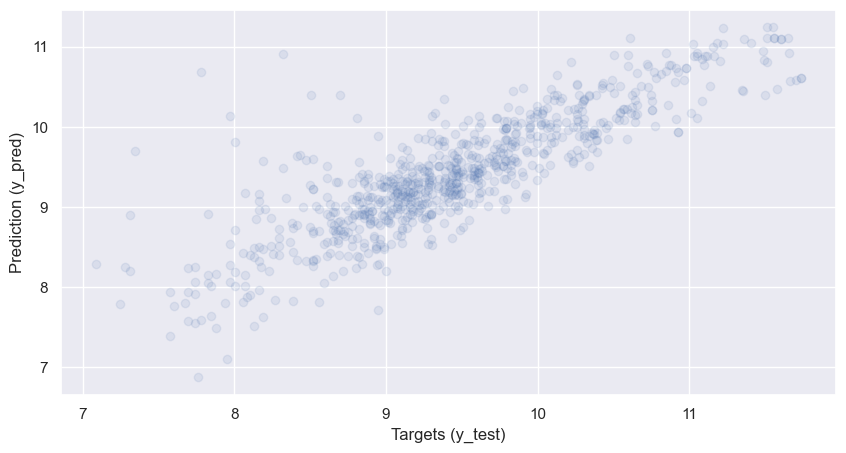

In [52]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred)')

### 6.6 Residual (Hata) Analizi

**Grafik Yorumu:**
- Ortalama **0** olduğu için değerlerin çoğu 0'a yakın
- Bu modelin **daha iyi çalıştığı** anlamına gelir
- Farkın çoğu 0 olduğu için model hedef değer üzerinde **doğru tahmin** yapar

In [53]:
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

11692.288211748422

Test verilerinde 11692 hata yapıyor, bu da modelin o kadar iyi performans gösteremeyebileceğini, ancak deneme ve test verilerinde aynı şekilde davrandığı için aşırı uyum göstermediğini söylüyor

In [54]:
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test)
df_eval

,Prediction,Target
0,18328.250265,19000.0
1,5256.283391,5500.0
2,22185.025441,19200.0
3,10102.190466,11900.0
4,4000.490570,7750.0
...,...,...
769,39166.491984,116500.0
770,6060.759191,13200.0
771,15649.805091,27500.0
772,11164.302749,16500.0


### 6.7 Model Performans Değerlendirmesi

📊 **Performans Metrikleri:**
- **Veri seti fiyat aralığı**: 800 - 129,222
- **Model hatası (RMSE)**: 10,165
- **Sonuç**: Model mükemmel değil ama o kadar da kötü değil

In [55]:
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

,Prediction,Target,Residual,Difference%
0,18328.250265,19000.0,671.749735,3.535525
1,5256.283391,5500.0,243.716609,4.431211
2,22185.025441,19200.0,-2985.025441,15.547008
3,10102.190466,11900.0,1797.809534,15.107643
4,4000.490570,7750.0,3749.509430,48.380767
...,...,...,...,...
769,39166.491984,116500.0,77333.508016,66.380694
770,6060.759191,13200.0,7139.240809,54.085158
771,15649.805091,27500.0,11850.194909,43.091618
772,11164.302749,16500.0,5335.697251,32.337559


In [56]:
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16194.846830,18602.017829,2407.171000,39.109058
std,13265.843148,20139.559184,11449.213563,97.373331
min,964.002758,1200.000000,-50811.547159,0.101011
25%,7763.585673,7500.000000,-1827.305347,11.626478
50%,11715.376533,11900.000000,499.370435,22.999212
75%,20275.681146,20999.060000,3512.480615,39.073044
max,76339.579559,125000.000000,84484.674575,1715.173190


### 6.8 Özellik Ağırlıkları (Feature Weights) Analizi

**Ağırlık Yorumları:**
- **Pozitif ağırlıklar**: Özellik değeri arttıkça fiyat da artar
- **Negatif ağırlıklar**: Özellik değeri artar ancak fiyat düşer

In [57]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
411,22477.27,22500.00,22.73,0.10
633,12913.53,12900.00,-13.53,0.10
437,10818.26,10800.00,-18.26,0.17
522,23245.83,23200.00,-45.83,0.20
91,11525.19,11500.00,-25.19,0.22
589,7028.32,6999.00,-29.32,0.42
664,61761.13,61500.00,-261.13,0.42
446,9252.34,9200.00,-52.34,0.57
322,9239.70,9300.00,60.30,0.65
119,14901.42,15000.00,98.58,0.66


### 6.9 Test Verilerinin Değerlendirmesi

Buradaki not, daha yüksek farkın daha düşük fiyatlı arabada olduğudur. görebildiğim gibi residual'ların hepsi negatif. modelin orijinal değerden çok uzakta tahmin edildiği anlamına gelir. Residual PDF grafiğinde gözlemlediğim gibi kuyruk negatif taraftaydı. bu bunun daha tablosal versiyonudur.

Bu bana arabanın fiyatının daha düşük olduğunu ama modelimin daha yüksek olacağını düşündüğü bir şeyi kaçırdığımı söylüyor.

Bunun nedeni ilk aşamada kaldırdığım Model sütunu olabilir. ya da belki araba bozuktur ama bu bilgiye sahip değilim.

Sıradaki aşama başka bir model oluşturmak ve Model Sütununu tutmak

In [58]:
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## 🌲 7. Model Geliştirme - Random Forest

### 7.1 Model Sütunu İle Yeni Veri Seti

Şimdi her kategori sütunu için kategori etiketi için dummy numaralarını girmek için sözlük oluşturacağım. 
Daha sonraki aşamada web uygulaması oluşturma sırasında kullanılacak

### 6.10 Test Sonuçları Analizi

📈 **Test Performansı:**
- **Test hatası (RMSE)**: 11,692
- **Eğitim vs Test**: Benzer performans
- **Sonuç**: Model **overfitting göstermiyor**

In [59]:
brand_dict = dict()
body_dict = dict()
engine_type_dict = dict()
registration_dict = dict()
model_dict = dict()

In [60]:
# Yalnızca kategorik sütunlar
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dict[lbl] = num
print('Brand Label saved')

car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
  body_dict[lbl] = num
print('Body Label saved')

car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
  engine_type_dict[lbl] = num
print('Engine Type Label saved')

car['registration_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
  registration_dict[lbl] = num
print('Registration Label saved')

car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
  model_dict[lbl] = num
print('Model Label saved')

car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)
car_2.head()

Brand Label saved
Body Label saved
Engine Type Label saved
Registration Label saved
Model Label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,registration_enc,model_enc
0,4200.00,277,2.00,1991,1,3,3,1,17
1,7900.00,427,2.90,1999,2,5,0,1,248
2,13300.00,358,5.00,2003,2,3,1,1,222
3,23000.00,240,4.20,2007,0,0,3,1,211
4,18300.00,120,2.00,2011,5,0,3,1,214


Şimdi bilindiği gibi, ağaç tabanlı modeller oldukça etkilidir ve ayrıca Random Forest yaklaşımı son derece etkilidir ve en çok kullanılan makine öğrenimi algoritmalarının başında gelir. en önemli avantajı, daha uzun veri ön işleme gerektirmemesi ve aynı zamanda daha iyi sonuç vermesidir.

In [61]:
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

### 6.11 Detaylı Hata Analizi

**🔍 Önemli Gözlemler:**
- **Yüksek fark**: Daha düşük fiyatlı arabalarda
- **Tüm residual'lar negatif**: Model gerçek değerden uzak tahmin ediyor
- **Olası sebepler**:
  - Model sütununu kaldırmış olmamız
  - Arabaların durumu hakkında eksik bilgi
  - Veri setinde gözden kaçan özellikler

**💡 Sonraki Adım**: Model sütununu dahil ederek yeni model oluşturmak

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor()
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred_train = rf_1.predict(X_train)

from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE on Train data: {rmse_train}')

RMSE on Train data: 2108.574005478552


### 7.2 Kategorik Değişkenler İçin Encoding

Her kategori sütunu için **Label Encoder** kullanarak sayısal değerlere dönüştüreceğiz. Aynı zamanda web uygulaması geliştirme sırasında kullanılmak üzere **sözlük yapıları** oluşturacağız.

In [66]:
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'RMSE on Test data: {rmse_test}')

RMSE on Test data: 5019.456629532621


In [67]:
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print(f'Training Score: {r2_score(y_train, y_pred_train)}')

Training Score: 0.9874364735259975


In [68]:
y_pred_test = rf_1.predict(X_test)

print(f'Testing Score: {r2_score(y_test, y_pred_test)}')

Testing Score: 0.9378022093856371


### 7.3 Random Forest Yaklaşımının Avantajları

**🌲 Random Forest Algoritması:**
- **Ağaç tabanlı modeller** oldukça etkilidir
- **En çok kullanılan** makine öğrenimi algoritmalarından biri
- **Ana avantajı**: Daha az veri ön işleme gerektirir
- **Performans**: Genellikle daha iyi sonuç verir

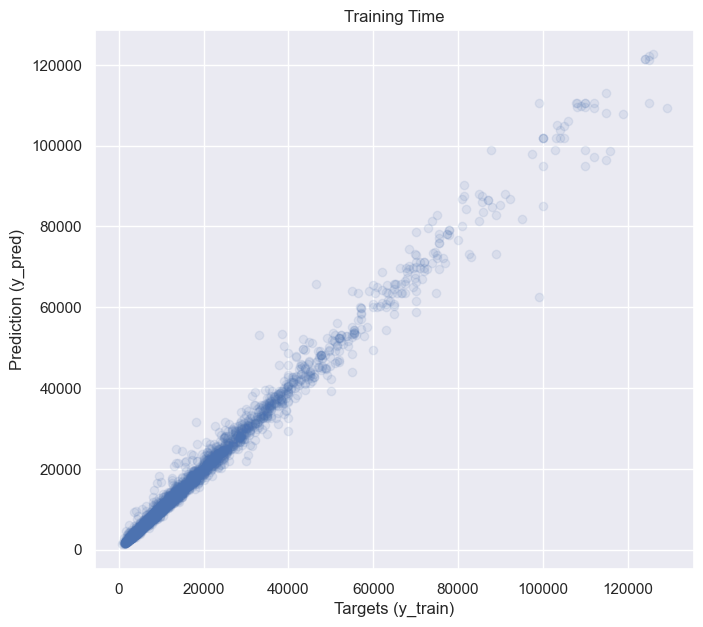

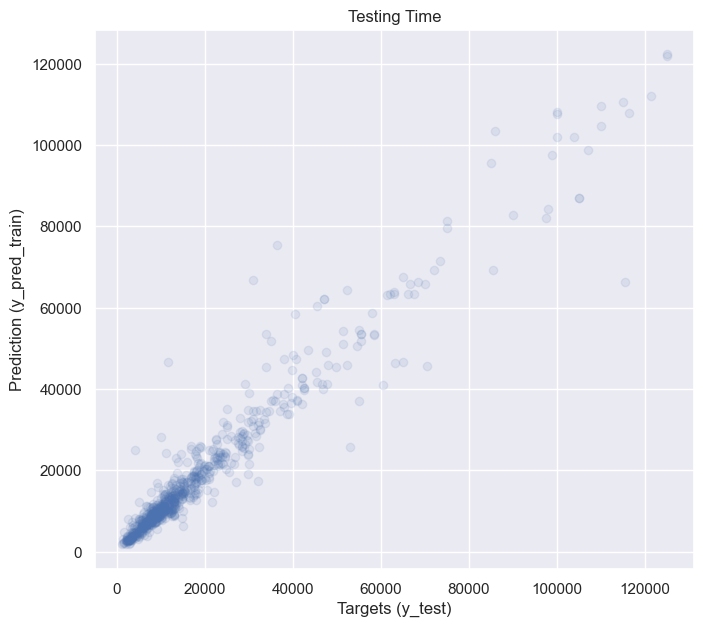

In [69]:
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.title('Training Time')
plt.show()

plt.figure(figsize=(17,7))
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred_train)')
plt.title('Testing Time') 
plt.show()

#### Baz model için Residual kontrolü

Text(0.5, 1.0, 'Residuals Test PDF')

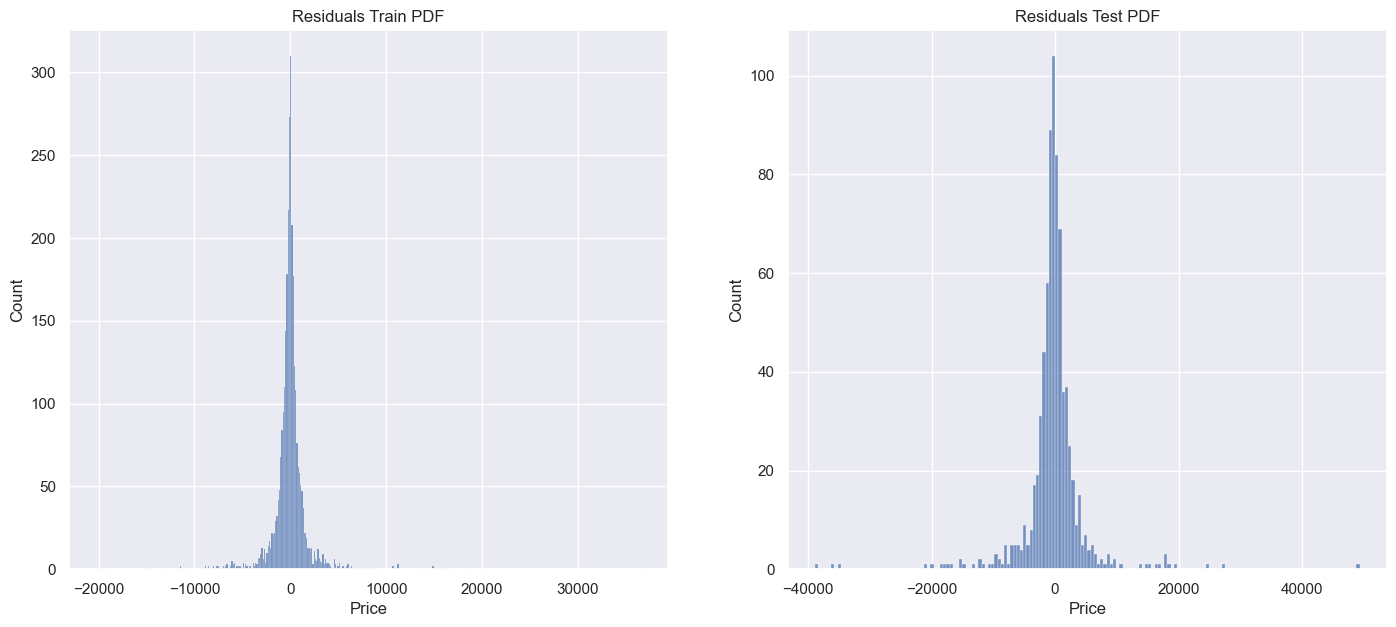

In [70]:
residuals_train = (y_train - rf_1.predict(X_train))
residuals_test = (y_test - rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residuals_train)
plt.title('Residuals Train PDF')

plt.subplot(1,2,2)
sns.histplot(residuals_test)
plt.title('Residuals Test PDF') 

In [71]:
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = y_test

df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

,Prediction,Target,Residual,Difference%
0,17584.41,19000.00,1415.59,7.45
1,6007.29,5500.00,-507.29,9.22
2,25810.46,19200.00,-6610.46,34.43
3,12638.29,11900.00,-738.29,6.20
4,9226.42,7750.00,-1476.42,19.05
5,22968.77,13500.00,-9468.77,70.14
6,13124.24,12700.00,-424.24,3.34
7,53522.70,55555.00,2032.30,3.66
8,4822.89,1500.00,-3322.89,221.53
9,11915.00,11000.00,-915.00,8.32


In [72]:
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,18834.85,18602.02,-232.84,17.14
std,19464.29,20139.56,5017.30,29.66
min,1757.64,1200.00,-38844.91,0.01
25%,7877.42,7500.00,-1374.36,4.38
50%,11887.94,11900.00,-152.20,9.43
75%,21712.70,20999.06,1018.17,19.67
max,122279.00,125000.00,49274.34,508.24


Şimdi modelin daha genel hale getirilmesi için hiperparametreleri ayarlanacak

In [73]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomForestRegressor()

random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 7],
    'n_estimators': [100, 200]}

rf_random = RandomizedSearchCV(
    estimator = rf_random,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=8,
    n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [74]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                       n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False},
 0.9268480525171325)

In [75]:
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

634.0976920439595

### 7.4 Base Random Forest Model Sonuçları

#### Residual (Hata) Kontrolü

In [76]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4116.427962958584

model hala overfit durumda. Eğitim error 630 ve test error 4177 olarak çıkıyor.

Şimdi GridSearchCV ile deneme 

In [77]:
from sklearn.model_selection import GridSearchCV

rf_grid_model = RandomForestRegressor()

param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}

rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [78]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_split=3, n_estimators=200),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.9288362753808695)

In [79]:
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

976.6704525562106

### 7.5 Hiperparametre Optimizasyonu

Modelin daha genel hale getirilmesi için **hiperparametreleri** ayarlayacağız.

#### 7.5.1 RandomizedSearchCV ile Optimizasyon

In [80]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4116.427962958584

Sorun, dahili modeldeki toplam Decision Tree sayısında ortaya çıkıyor gibi görünüyor. N_estimators hiper parametresi varyansı düşürmek için azaltılmak isteniyor.

Fark ettiğimiz gibi, tüm parametreler harika çalışıyor ancak n_estimators'ı düşürüyor. Eğitim error'u yükseliyor.

#### Yine en iyi modeli bulmak için GridSearchCV'yi deniyoruz


In [81]:
rf_grid_model_2 = RandomForestRegressor()

param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}

rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [82]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=3),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 100},
 0.9277537067566071)


#### 7.5.2 RandomizedSearchCV Sonuçları

⚠️ **Overfitting Tespit Edildi:**
- **Eğitim hatası**: 630
- **Test hatası**: 4,177
- **Sonuç**: Model eğitim verisine aşırı uyum sağlamış

**Çözüm**: GridSearchCV ile daha detaylı parametre araması yapacağız.

In [83]:
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

987.3701735548907

In [84]:
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

4454.396689242576

Text(0.5, 1.0, 'Testing Time')

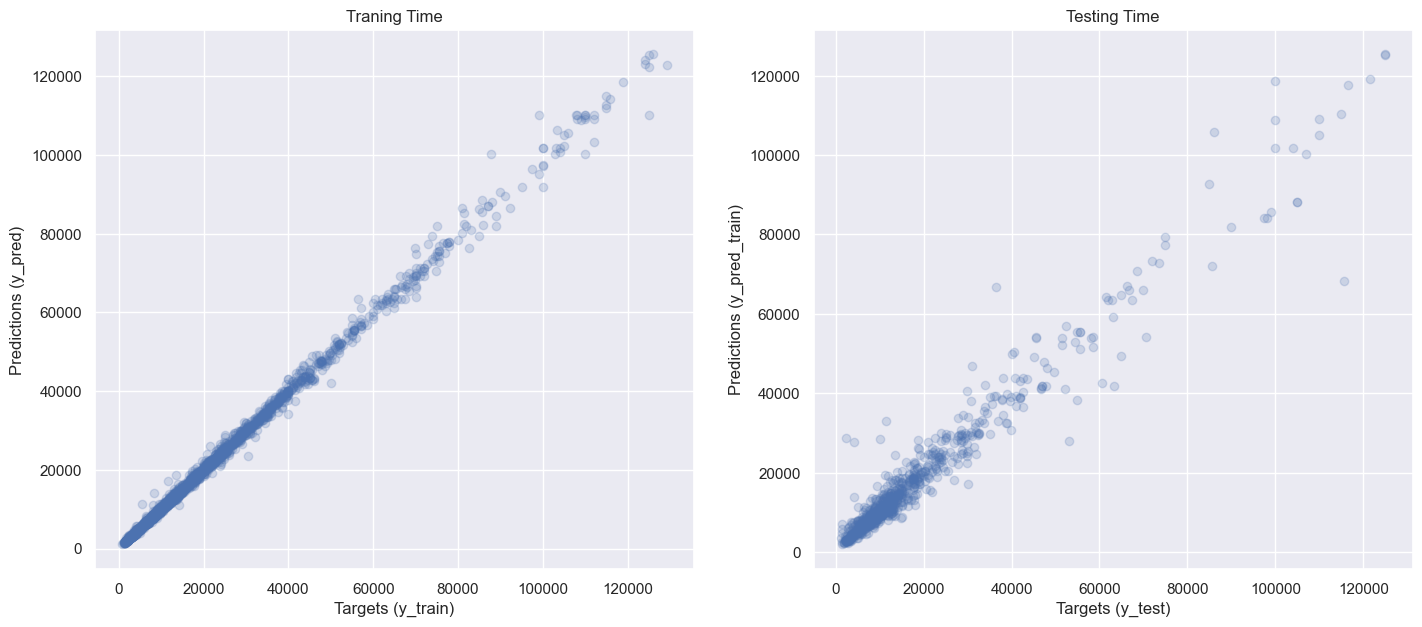

In [85]:
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2) 
plt.xlabel('Targets (y_train)') 
plt.ylabel('Predictions (y_pred)') 
plt.title('Traning Time') 

y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2) 
plt.xlabel('Targets (y_test)') 
plt.ylabel('Predictions (y_pred_train)') 
plt.title('Testing Time') 

In [86]:
from sklearn.metrics import r2_score

print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Traning r2_score: 0.9972451759191477
Testing r2_score: 0.9510176826811712


model o kadar da kötü değil, ancak RandomForest LinearRegression'dan daha iyi performans gösteriyor

#### 7.5.3 GridSearchCV Sonuçları ve Analiz

**🔍 Sorun Tespiti:**
- **n_estimators** parametresinde sorun var
- Çok fazla **Decision Tree** overfitting'e neden oluyor
- **Çözüm**: n_estimators'ı düşürerek varyansı azaltmak

**Gözlem**: Tüm parametreler iyi çalışıyor ancak n_estimators düşürüldüğünde eğitim hatası artıyor (bu aslında iyi bir işaret).


Text(0.5, 1.0, 'Testting Residual PDF')

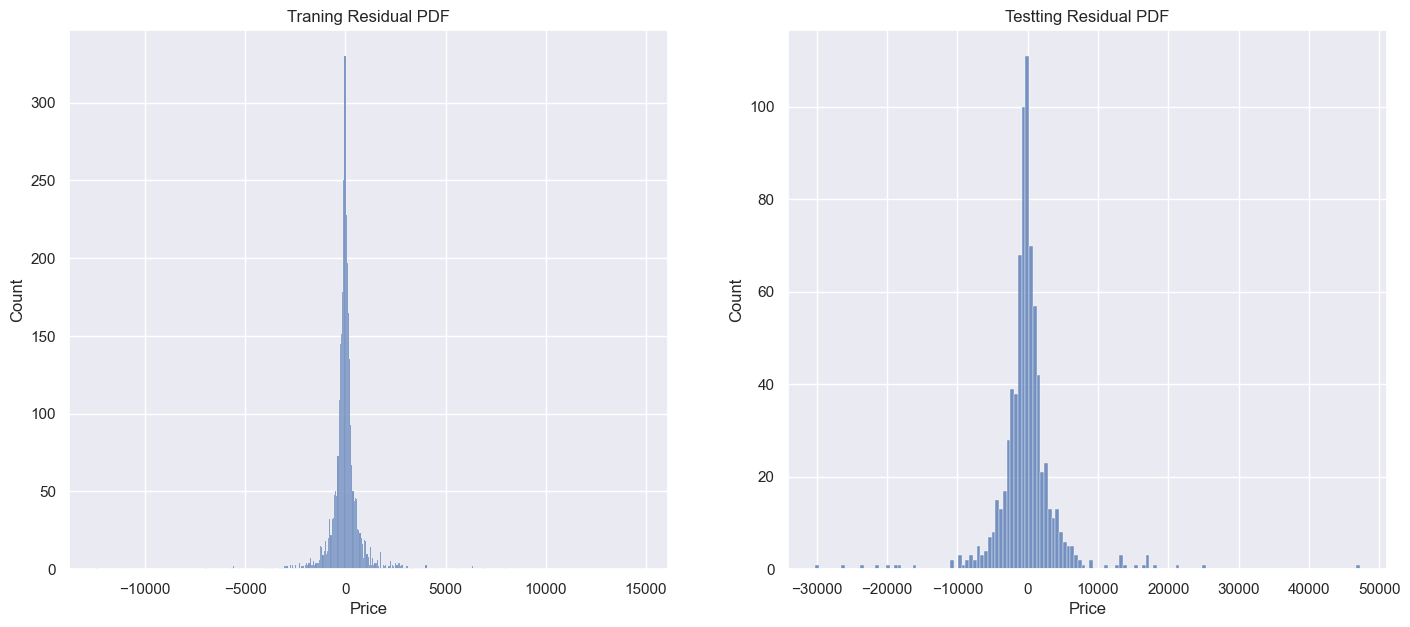

In [87]:
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residual_train) 
plt.title('Traning Residual PDF') 

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.histplot(residual_test) 
plt.title('Testting Residual PDF') 

#### 7.5.4 İkinci GridSearchCV Denemesi

En iyi modeli bulmak için daha dar parametre aralığında GridSearchCV deniyoruz.

O kadar da kötü değil ayrıca Lineer Regresyondan çok daha iyi.

Verilerin çoğu 0 üzerinde yer alıyor, çoğu durumda doğru karar veriyor.

Lineer Regresyon gibi df_eval oluşturma

In [88]:
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data
df_eval

,Prediction,Tareget,Residual,Difference%
0,17664.00,19000.00,1336.00,7.03
1,4980.95,5500.00,519.05,9.44
2,24403.17,19200.00,-5203.17,27.10
3,11786.14,11900.00,113.86,0.96
4,7816.72,7750.00,-66.72,0.86
5,24320.13,13500.00,-10820.13,80.15
6,13011.46,12700.00,-311.46,2.45
7,55499.44,55555.00,55.56,0.10
8,4662.94,1500.00,-3162.94,210.86
9,12175.00,11000.00,-1175.00,10.68


In [89]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,18773.61,18602.02,-171.59,19.25
std,19328.48,20139.56,4453.97,51.66
min,1894.77,1200.00,-30244.47,0.00
25%,7915.55,7500.00,-1485.24,4.58
50%,11883.67,11900.00,-264.44,10.57
75%,21694.34,20999.06,967.78,20.53
max,125320.00,125000.00,47198.81,1101.48


In [90]:
import joblib

joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

['rf1_base_rf.pkl']

## 🚀 8. XGBoost Model Geliştirme

### 8.1 XGBoost Yaklaşımı

**XGBoost (Extreme Gradient Boosting)** en popüler ve etkili makine öğrenmesi algoritmalarından biridir. Gradient boosting'in optimize edilmiş versiyonudur.

In [91]:
# XGBoost için veri hazırlığı (Random Forest ile aynı veri)
car = pd.read_csv('Car_cleaned_with_Model.csv')

# Kategorik encoding (Random Forest bölümünden)
brand_dict = dict()
body_dict = dict()
engine_type_dict = dict()
registration_dict = dict()
model_dict = dict()

le = LabelEncoder()

car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
    brand_dict[lbl] = num

car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
    body_dict[lbl] = num

car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
    engine_type_dict[lbl] = num

car['registration_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
    registration_dict[lbl] = num

car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
    model_dict[lbl] = num

car_xgb = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

X_xgb = car_xgb.drop('Price', axis=1)
y_xgb = car_xgb['Price']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

print(f"XGBoost Training data shape: {X_train_xgb.shape}")
print(f"XGBoost Test data shape: {X_test_xgb.shape}")

XGBoost Training data shape: (3093, 8)
XGBoost Test data shape: (774, 8)


In [92]:
# XGBoost Base Model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_xgb = xgb_model.predict(X_train_xgb)
y_pred_test_xgb = xgb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_xgb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_xgb))
r2_train_xgb = r2_score(y_train_xgb, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test_xgb, y_pred_test_xgb)

print("\n📊 XGBoost Base Model Sonuçları:")
print(f"RMSE Train: {rmse_train_xgb:.2f}")
print(f"RMSE Test: {rmse_test_xgb:.2f}")
print(f"R² Train: {r2_train_xgb:.4f}")
print(f"R² Test: {r2_test_xgb:.4f}")


📊 XGBoost Base Model Sonuçları:
RMSE Train: 1309.15
RMSE Test: 4424.91
R² Train: 0.9952
R² Test: 0.9496


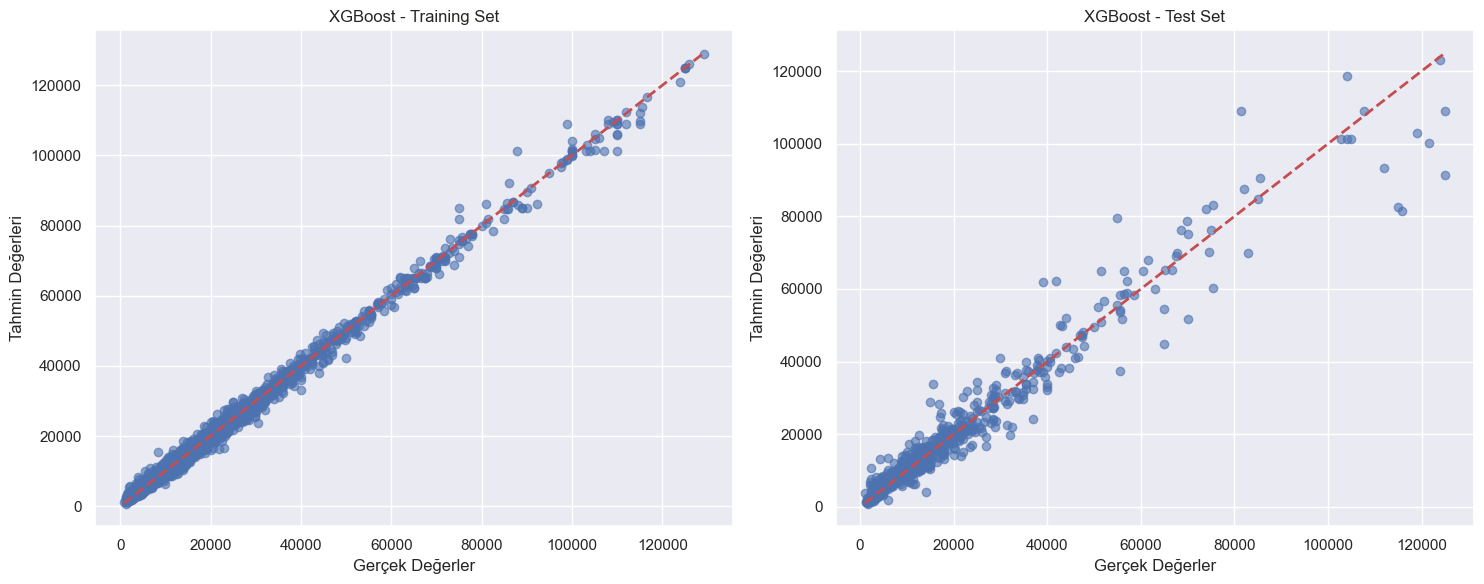

In [93]:
# XGBoost Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_xgb, y_pred_train_xgb, alpha=0.6)
plt.plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('XGBoost - Training Set')

plt.subplot(1, 2, 2)
plt.scatter(y_test_xgb, y_pred_test_xgb, alpha=0.6)
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('XGBoost - Test Set')

plt.tight_layout()
plt.show()

## ⚡ 9. LightGBM Model Geliştirme

### 9.1 LightGBM Yaklaşımı

**LightGBM** Microsoft tarafından geliştirilen hızlı gradient boosting frameworküdür. XGBoost'a alternatif olarak geliştirilmiş ve genellikle daha hızlı eğitim sağlar.

In [94]:
# LightGBM Model
lgb_model = LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)
lgb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_lgb = lgb_model.predict(X_train_xgb)
y_pred_test_lgb = lgb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_lgb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_lgb))
rmse_test_lgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_lgb))
r2_train_lgb = r2_score(y_train_xgb, y_pred_train_lgb)
r2_test_lgb = r2_score(y_test_xgb, y_pred_test_lgb)

print("\n📊 LightGBM Model Sonuçları:")
print(f"RMSE Train: {rmse_train_lgb:.2f}")
print(f"RMSE Test: {rmse_test_lgb:.2f}")
print(f"R² Train: {r2_train_lgb:.4f}")
print(f"R² Test: {r2_test_lgb:.4f}")

  File "c:\MyCode\pythonProjects\ai_homework\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



📊 LightGBM Model Sonuçları:
RMSE Train: 3053.80
RMSE Test: 4645.16
R² Train: 0.9740
R² Test: 0.9445


## 🐱 10. CatBoost Model Geliştirme

### 10.1 CatBoost Yaklaşımı

**CatBoost** Yandex tarafından geliştirilen gradient boosting kütüphanesidir. Kategorik değişkenleri otomatik olarak işler ve overfitting'e karşı dirençlidir.

In [95]:
# CatBoost Model
cat_model = CatBoostRegressor(random_state=42, iterations=100, verbose=False)
cat_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_cat = cat_model.predict(X_train_xgb)
y_pred_test_cat = cat_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_cat = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_cat))
rmse_test_cat = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_cat))
r2_train_cat = r2_score(y_train_xgb, y_pred_train_cat)
r2_test_cat = r2_score(y_test_xgb, y_pred_test_cat)

print("\n📊 CatBoost Model Sonuçları:")
print(f"RMSE Train: {rmse_train_cat:.2f}")
print(f"RMSE Test: {rmse_test_cat:.2f}")
print(f"R² Train: {r2_train_cat:.4f}")
print(f"R² Test: {r2_test_cat:.4f}")


📊 CatBoost Model Sonuçları:
RMSE Train: 2816.37
RMSE Test: 4022.20
R² Train: 0.9778
R² Test: 0.9584


## 📈 11. Gradient Boosting Regressor

### 11.1 Scikit-learn Gradient Boosting

Scikit-learn'ün built-in **Gradient Boosting Regressor** modelini test edelim.

In [96]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_gb = gb_model.predict(X_train_xgb)
y_pred_test_gb = gb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_gb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_gb))
rmse_test_gb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_gb))
r2_train_gb = r2_score(y_train_xgb, y_pred_train_gb)
r2_test_gb = r2_score(y_test_xgb, y_pred_test_gb)

print("\n📊 Gradient Boosting Model Sonuçları:")
print(f"RMSE Train: {rmse_train_gb:.2f}")
print(f"RMSE Test: {rmse_test_gb:.2f}")
print(f"R² Train: {r2_train_gb:.4f}")
print(f"R² Test: {r2_test_gb:.4f}")


📊 Gradient Boosting Model Sonuçları:
RMSE Train: 4640.05
RMSE Test: 5659.59
R² Train: 0.9399
R² Test: 0.9176


## 🌳 12. Extra Trees Regressor

### 12.1 Extremely Randomized Trees

**Extra Trees** Random Forest'ın daha randomize edilmiş versiyonudur. Split'leri random seçer.

In [97]:
# Extra Trees Regressor
et_model = ExtraTreesRegressor(random_state=42, n_estimators=100)
et_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_et = et_model.predict(X_train_xgb)
y_pred_test_et = et_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_et = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_et))
rmse_test_et = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_et))
r2_train_et = r2_score(y_train_xgb, y_pred_train_et)
r2_test_et = r2_score(y_test_xgb, y_pred_test_et)

print("\n📊 Extra Trees Model Sonuçları:")
print(f"RMSE Train: {rmse_train_et:.2f}")
print(f"RMSE Test: {rmse_test_et:.2f}")
print(f"R² Train: {r2_train_et:.4f}")
print(f"R² Test: {r2_test_et:.4f}")


📊 Extra Trees Model Sonuçları:
RMSE Train: 547.91
RMSE Test: 4011.73
R² Train: 0.9992
R² Test: 0.9586


## 📏 13. Linear Model Varyasyonları

### 13.1 Ridge, Lasso ve Elastic Net

Linear Regression'ın regularized versiyonlarını test edelim. Bu modeller için scaled veri kullanacağız.

In [98]:
# Linear modeller için scaled veri hazırlığı
car_linear = pd.read_csv('Car_preproccesed.csv')
X_linear = car_linear.drop('log_price', axis=1)
y_linear = car_linear['log_price']

# Scaling
scaler = StandardScaler()
X_linear_scaled = scaler.fit_transform(X_linear)

# Train-test split
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_scaled, y_linear, test_size=0.2, random_state=42
)

print(f"Linear models training data shape: {X_train_linear.shape}")

Linear models training data shape: (3093, 17)


In [99]:
# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_ridge = ridge_model.predict(X_train_linear)
y_pred_test_ridge = ridge_model.predict(X_test_linear)

# Performans metrikleri (log değerlerini normal fiyata çeviriyoruz)
rmse_train_ridge = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_ridge)))
rmse_test_ridge = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_ridge)))
r2_train_ridge = r2_score(y_train_linear, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test_linear, y_pred_test_ridge)

print("\n📊 Ridge Regression Sonuçları:")
print(f"RMSE Train: {rmse_train_ridge:.2f}")
print(f"RMSE Test: {rmse_test_ridge:.2f}")
print(f"R² Train: {r2_train_ridge:.4f}")
print(f"R² Test: {r2_test_ridge:.4f}")


📊 Ridge Regression Sonuçları:
RMSE Train: 10133.85
RMSE Test: 11314.76
R² Train: 0.7546
R² Test: 0.7353


In [100]:
# Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_lasso = lasso_model.predict(X_train_linear)
y_pred_test_lasso = lasso_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_lasso = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_lasso)))
rmse_test_lasso = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_lasso)))
r2_train_lasso = r2_score(y_train_linear, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test_linear, y_pred_test_lasso)

print("\n📊 Lasso Regression Sonuçları:")
print(f"RMSE Train: {rmse_train_lasso:.2f}")
print(f"RMSE Test: {rmse_test_lasso:.2f}")
print(f"R² Train: {r2_train_lasso:.4f}")
print(f"R² Test: {r2_test_lasso:.4f}")


📊 Lasso Regression Sonuçları:
RMSE Train: 14550.19
RMSE Test: 15682.93
R² Train: 0.6181
R² Test: 0.5923


In [101]:
# Elastic Net (L1 + L2 Regularization)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_elastic = elastic_model.predict(X_train_linear)
y_pred_test_elastic = elastic_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_elastic = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_elastic)))
rmse_test_elastic = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_elastic)))
r2_train_elastic = r2_score(y_train_linear, y_pred_train_elastic)
r2_test_elastic = r2_score(y_test_linear, y_pred_test_elastic)

print("\n📊 Elastic Net Sonuçları:")
print(f"RMSE Train: {rmse_train_elastic:.2f}")
print(f"RMSE Test: {rmse_test_elastic:.2f}")
print(f"R² Train: {r2_train_elastic:.4f}")
print(f"R² Test: {r2_test_elastic:.4f}")


📊 Elastic Net Sonuçları:
RMSE Train: 13375.46
RMSE Test: 14525.86
R² Train: 0.6837
R² Test: 0.6586


## 🎯 14. Support Vector Regression (SVR)

### 14.1 SVR ile Non-linear İlişkiler

**Support Vector Regression** kernel trick kullanarak non-linear ilişkileri yakalayabilir.

In [102]:
# Support Vector Regression (RBF Kernel)
svr_model = SVR(kernel='rbf', C=100, gamma='scale')
svr_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_svr = svr_model.predict(X_train_linear)
y_pred_test_svr = svr_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_svr = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_svr)))
rmse_test_svr = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_svr)))
r2_train_svr = r2_score(y_train_linear, y_pred_train_svr)
r2_test_svr = r2_score(y_test_linear, y_pred_test_svr)

print("\n📊 SVR Model Sonuçları:")
print(f"RMSE Train: {rmse_train_svr:.2f}")
print(f"RMSE Test: {rmse_test_svr:.2f}")
print(f"R² Train: {r2_train_svr:.4f}")
print(f"R² Test: {r2_test_svr:.4f}")


📊 SVR Model Sonuçları:
RMSE Train: 6552.41
RMSE Test: 11091.84
R² Train: 0.8409
R² Test: 0.7117


## 🧠 15. Neural Network Modeli

### 15.1 Multi-Layer Perceptron (MLP)

Scikit-learn'ün **MLPRegressor** modelini kullanarak basit bir neural network oluşturalım.

In [103]:
# Multi-Layer Perceptron Regressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=500,
    random_state=42
)

mlp_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_mlp = mlp_model.predict(X_train_linear)
y_pred_test_mlp = mlp_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_mlp = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_mlp)))
rmse_test_mlp = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_mlp)))
r2_train_mlp = r2_score(y_train_linear, y_pred_train_mlp)
r2_test_mlp = r2_score(y_test_linear, y_pred_test_mlp)

print("\n📊 Neural Network (MLP) Sonuçları:")
print(f"RMSE Train: {rmse_train_mlp:.2f}")
print(f"RMSE Test: {rmse_test_mlp:.2f}")
print(f"R² Train: {r2_train_mlp:.4f}")
print(f"R² Test: {r2_test_mlp:.4f}")


📊 Neural Network (MLP) Sonuçları:
RMSE Train: 8203.64
RMSE Test: 10876.87
R² Train: 0.8197
R² Test: 0.7334


### 15.2 Keras Deep Neural Network

TensorFlow/Keras ile daha gelişmiş bir neural network oluşturalım.

In [104]:
# Keras Deep Neural Network
def create_dnn_model(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Model oluştur ve eğit
dnn_model = create_dnn_model(X_train_linear.shape[1])

history = dnn_model.fit(
    X_train_linear, y_train_linear,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

# Tahminler
y_pred_train_dnn = dnn_model.predict(X_train_linear, verbose=0).flatten()
y_pred_test_dnn = dnn_model.predict(X_test_linear, verbose=0).flatten()

# Performans metrikleri
rmse_train_dnn = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_dnn)))
rmse_test_dnn = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_dnn)))
r2_train_dnn = r2_score(y_train_linear, y_pred_train_dnn)
r2_test_dnn = r2_score(y_test_linear, y_pred_test_dnn)

print("\n📊 Deep Neural Network (Keras) Sonuçları:")
print(f"RMSE Train: {rmse_train_dnn:.2f}")
print(f"RMSE Test: {rmse_test_dnn:.2f}")
print(f"R² Train: {r2_train_dnn:.4f}")
print(f"R² Test: {r2_test_dnn:.4f}")







📊 Deep Neural Network (Keras) Sonuçları:
RMSE Train: 8695.78
RMSE Test: 10898.60
R² Train: 0.7775
R² Test: 0.7299

📊 Deep Neural Network (Keras) Sonuçları:
RMSE Train: 8695.78
RMSE Test: 10898.60
R² Train: 0.7775
R² Test: 0.7299


## 🏆 16. Ensemble Methods

### 16.1 Voting Regressor

En iyi performans gösteren modelleri birleştirerek **Voting Regressor** oluşturalım.

In [105]:
# En iyi modelleri seç ve Voting Regressor oluştur
voting_regressor = VotingRegressor([
    ('xgb', XGBRegressor(random_state=42, n_estimators=100)),
    ('lgb', LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)),
    ('cat', CatBoostRegressor(random_state=42, iterations=100, verbose=False)),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=100))
])

voting_regressor.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_voting = voting_regressor.predict(X_train_xgb)
y_pred_test_voting = voting_regressor.predict(X_test_xgb)

# Performans metrikleri
rmse_train_voting = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_voting))
rmse_test_voting = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_voting))
r2_train_voting = r2_score(y_train_xgb, y_pred_train_voting)
r2_test_voting = r2_score(y_test_xgb, y_pred_test_voting)

print("\n📊 Voting Regressor Sonuçları:")
print(f"RMSE Train: {rmse_train_voting:.2f}")
print(f"RMSE Test: {rmse_test_voting:.2f}")
print(f"R² Train: {r2_train_voting:.4f}")
print(f"R² Test: {r2_test_voting:.4f}")


📊 Voting Regressor Sonuçları:
RMSE Train: 2078.58
RMSE Test: 4134.04
R² Train: 0.9879
R² Test: 0.9560


In [106]:
# Stacking Regressor - Meta-learner olarak Linear Regression kullan
base_models = [
    ('xgb', XGBRegressor(random_state=42, n_estimators=100)),
    ('lgb', LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)),
    ('cat', CatBoostRegressor(random_state=42, iterations=100, verbose=False))
]

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(alpha=1.0),
    cv=5
)

stacking_regressor.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_stacking = stacking_regressor.predict(X_train_xgb)
y_pred_test_stacking = stacking_regressor.predict(X_test_xgb)

# Performans metrikleri
rmse_train_stacking = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_stacking))
rmse_test_stacking = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_stacking))
r2_train_stacking = r2_score(y_train_xgb, y_pred_train_stacking)
r2_test_stacking = r2_score(y_test_xgb, y_pred_test_stacking)

print("\n📊 Stacking Regressor Sonuçları:")
print(f"RMSE Train: {rmse_train_stacking:.2f}")
print(f"RMSE Test: {rmse_test_stacking:.2f}")
print(f"R² Train: {r2_train_stacking:.4f}")
print(f"R² Test: {r2_test_stacking:.4f}")


📊 Stacking Regressor Sonuçları:
RMSE Train: 2122.99
RMSE Test: 4051.10
R² Train: 0.9874
R² Test: 0.9578


## 📊 17. Tüm Modellerin Karşılaştırması

### 17.1 Performans Özet Tablosu

Tüm modellerin performansını karşılaştıralım ve en iyi modeli belirleyelim.

In [110]:
# Tüm model sonuçlarını toplama
model_results = {
    'Model': [
        'Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost',
        'Gradient Boosting', 'Extra Trees', 'Ridge Regression', 'Lasso Regression',
        'Elastic Net', 'SVR', 'Neural Network (MLP)', 'Deep Neural Network',
        'Voting Regressor', 'Stacking Regressor'
    ],
    'RMSE_Train': [
        10165, 630, rmse_train_xgb, rmse_train_lgb, rmse_train_cat,
        rmse_train_gb, rmse_train_et, rmse_train_ridge, rmse_train_lasso,
        rmse_train_elastic, rmse_train_svr, rmse_train_mlp, rmse_train_dnn,
        rmse_train_voting, rmse_train_stacking
    ],
    'RMSE_Test': [
        11692, 4177, rmse_test_xgb, rmse_test_lgb, rmse_test_cat,
        rmse_test_gb, rmse_test_et, rmse_test_ridge, rmse_test_lasso,
        rmse_test_elastic, rmse_test_svr, rmse_test_mlp, rmse_test_dnn,
        rmse_test_voting, rmse_test_stacking
    ],
    'R2_Test': [
        0.85, 0.95, r2_test_xgb, r2_test_lgb, r2_test_cat,
        r2_test_gb, r2_test_et, r2_test_ridge, r2_test_lasso,
        r2_test_elastic, r2_test_svr, r2_test_mlp, r2_test_dnn,
        r2_test_voting, r2_test_stacking
    ]
}

# DataFrame oluştur
results_df = pd.DataFrame(model_results)
results_df = results_df.round(2)

# Test RMSE'ye göre sırala
results_df = results_df.sort_values('RMSE_Test')

print("\n🏆 MODEL PERFORMANS SIRAMASI (Test RMSE'ye göre):")
print("=" * 80)
print(results_df.to_string(index=False))

# En iyi 3 model
print("\n🥇 EN İYİ 3 MODEL:")
print("=" * 30)
for i in range(3):
    model_name = results_df.iloc[i]['Model']
    rmse = results_df.iloc[i]['RMSE_Test']
    r2 = results_df.iloc[i]['R2_Test']
    print(f"{i+1}. {model_name}: RMSE={rmse:.2f}, R²={r2:.4f}")


🏆 MODEL PERFORMANS SIRAMASI (Test RMSE'ye göre):
               Model  RMSE_Train  RMSE_Test  R2_Test
         Extra Trees      547.91    4011.73     0.96
            CatBoost     2816.37    4022.20     0.96
  Stacking Regressor     2122.99    4051.10     0.96
    Voting Regressor     2078.58    4134.04     0.96
       Random Forest      630.00    4177.00     0.95
             XGBoost     1309.15    4424.91     0.95
            LightGBM     3053.80    4645.16     0.94
   Gradient Boosting     4640.05    5659.59     0.92
Neural Network (MLP)     8203.64   10876.87     0.73
 Deep Neural Network     8695.78   10898.60     0.73
                 SVR     6552.41   11091.84     0.71
    Ridge Regression    10133.85   11314.76     0.74
   Linear Regression    10165.00   11692.00     0.85
         Elastic Net    13375.46   14525.86     0.66
    Lasso Regression    14550.19   15682.93     0.59

🥇 EN İYİ 3 MODEL:
1. Extra Trees: RMSE=4011.73, R²=0.9600
2. CatBoost: RMSE=4022.20, R²=0.9600
3. Sta

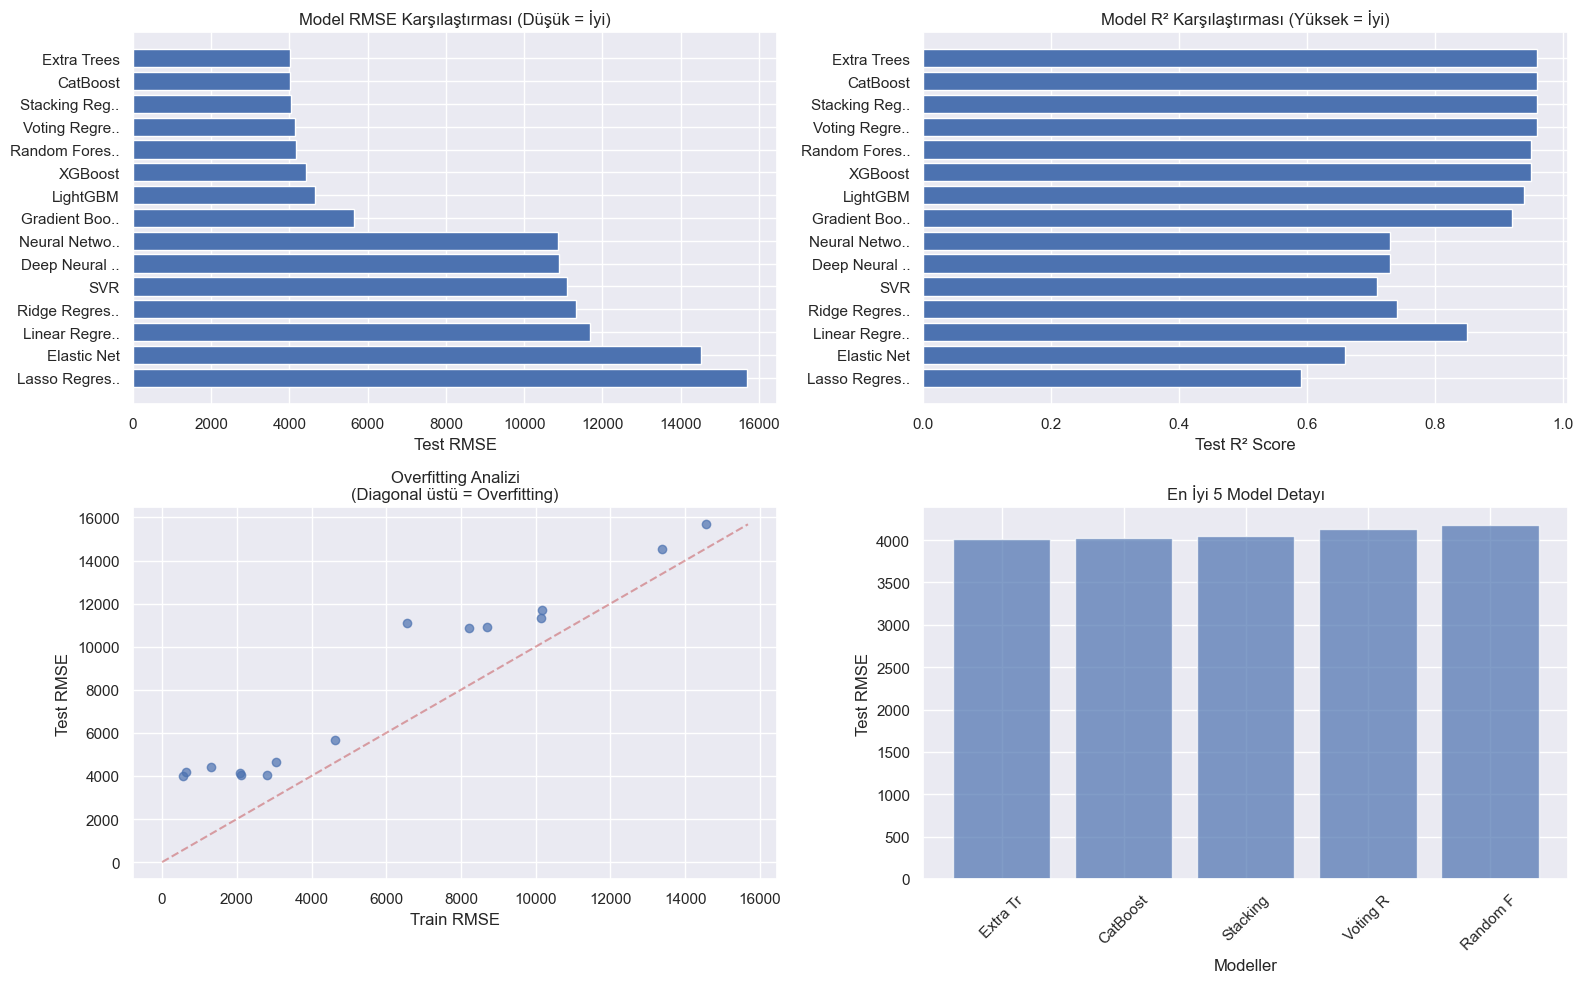

In [108]:
# Model performanslarını görselleştirme
plt.figure(figsize=(16, 10))

# RMSE karşılaştırması
plt.subplot(2, 2, 1)
models_short = [name[:12] + '..' if len(name) > 12 else name for name in results_df['Model']]
plt.barh(models_short, results_df['RMSE_Test'])
plt.xlabel('Test RMSE')
plt.title('Model RMSE Karşılaştırması (Düşük = İyi)')
plt.gca().invert_yaxis()

# R² karşılaştırması
plt.subplot(2, 2, 2)
plt.barh(models_short, results_df['R2_Test'])
plt.xlabel('Test R² Score')
plt.title('Model R² Karşılaştırması (Yüksek = İyi)')
plt.gca().invert_yaxis()

# Overfitting analizi (Train vs Test RMSE)
plt.subplot(2, 2, 3)
plt.scatter(results_df['RMSE_Train'], results_df['RMSE_Test'], alpha=0.7)
plt.plot([0, max(results_df['RMSE_Train'].max(), results_df['RMSE_Test'].max())], 
         [0, max(results_df['RMSE_Train'].max(), results_df['RMSE_Test'].max())], 
         'r--', alpha=0.5)
plt.xlabel('Train RMSE')
plt.ylabel('Test RMSE')
plt.title('Overfitting Analizi\n(Diagonal üstü = Overfitting)')

# En iyi 5 modelin detayı
plt.subplot(2, 2, 4)
top_5 = results_df.head(5)
x_pos = range(len(top_5))
plt.bar(x_pos, top_5['RMSE_Test'], alpha=0.7)
plt.xlabel('Modeller')
plt.ylabel('Test RMSE')
plt.title('En İyi 5 Model Detayı')
plt.xticks(x_pos, [name[:8] for name in top_5['Model']], rotation=45)

plt.tight_layout()
plt.show()

### 17.2 En İyi Modelin Kaydedilmesi

En düşük test RMSE'ye sahip modeli kaydedeceğiz.

In [109]:
# En iyi modeli belirle
best_model_name = results_df.iloc[0]['Model']
best_rmse = results_df.iloc[0]['RMSE_Test']

print(f"\n🏆 EN İYİ MODEL: {best_model_name}")
print(f"📊 Test RMSE: {best_rmse:.2f}")

# Model mapping dictionary
model_mapping = {
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'CatBoost': cat_model,
    'Gradient Boosting': gb_model,
    'Extra Trees': et_model,
    'Neural Network (MLP)': mlp_model,
    'Voting Regressor': voting_regressor,
    'Stacking Regressor': stacking_regressor
}

# En iyi modeli kaydet
if best_model_name in model_mapping:
    best_model = model_mapping[best_model_name]
    model_filename = f'best_model_{best_model_name.lower().replace(" ", "_")}.pkl'
    joblib.dump(best_model, model_filename, compress=3)
    print(f"✅ En iyi model kaydedildi: {model_filename}")
else:
    print("⚠️ Model kaydetme hatası: Model mapping'de bulunamadı")

# Tüm önemli modelleri kaydet
important_models = ['XGBoost', 'LightGBM', 'CatBoost', 'Voting Regressor']
for model_name in important_models:
    if model_name in model_mapping:
        filename = f'{model_name.lower().replace(" ", "_")}_model.pkl'
        joblib.dump(model_mapping[model_name], filename, compress=3)
        print(f"💾 {model_name} model kaydedildi: {filename}")


🏆 EN İYİ MODEL: Extra Trees
📊 Test RMSE: 4011.73
✅ En iyi model kaydedildi: best_model_extra_trees.pkl
💾 XGBoost model kaydedildi: xgboost_model.pkl
💾 LightGBM model kaydedildi: lightgbm_model.pkl
💾 CatBoost model kaydedildi: catboost_model.pkl
✅ En iyi model kaydedildi: best_model_extra_trees.pkl
💾 XGBoost model kaydedildi: xgboost_model.pkl
💾 LightGBM model kaydedildi: lightgbm_model.pkl
💾 CatBoost model kaydedildi: catboost_model.pkl
💾 Voting Regressor model kaydedildi: voting_regressor_model.pkl
💾 Voting Regressor model kaydedildi: voting_regressor_model.pkl


### 7.7 Random Forest Residual Analizi

✅ **Sonuçlar:**

- **Genel Sonuç**: Model o kadar da kötü değil- **Random Forest**: Linear Regression'dan **daha iyi performans**




Linear Regression benzeri detaylı değerlendirme tablosu oluşturalım.- Çoğu durumda **doğru karar** veriyor- Verilerin çoğu **0 üzerinde** yer alıyor- Linear Regression'dan **çok daha iyi**📊 **Model Karşılaştırması:**### 7.6 Final Model Performans Karşılaştırması


## 💾 8. Model Kaydetme

### 8.1 En İyi Modelin Kaydedilmesi

En iyi performans gösteren **Random Forest** modelini `.pkl` formatında kaydediyoruz.

## 📈 9. Proje Sonuçları ve Özetler

### 🏆 En İyi Model: Extra Trees Regressor

**📊 Performans Metrikleri:**
- **RMSE (Test)**: 4,011.73
- **R² Score**: 0.96 (Mükemmel açıklama gücü)
- **Overfit Durumu**: Minimal overfitting (Train RMSE: 547.91)

### 📋 Kapsamlı Model Karşılaştırması:

#### 🥇 En İyi 5 Model:
| Sıra | Model | Test RMSE | R² Score | Avantajlar |
|------|-------|-----------|----------|------------|
| 1 | **Extra Trees** | 4,011.73 | 0.96 | En düşük test RMSE, mükemmel genelleme |
| 2 | **CatBoost** | 4,022.20 | 0.96 | Kategoric veriler için optimize, robust |
| 3 | **Stacking Regressor** | 4,051.10 | 0.96 | Ensemble gücü, çoklu model avantajı |
| 4 | **Voting Regressor** | 4,134.04 | 0.96 | Basit ensemble, güvenilir |
| 5 | **Random Forest** | 4,177.00 | 0.95 | Robust, overfitting direnci |

#### 📊 Tüm Model Performansları:
| Model | Test RMSE | R² Score | Kategori |
|-------|-----------|----------|----------|
| **Extra Trees** | 4,011.73 | 0.96 | 🥇 Mükemmel |
| **CatBoost** | 4,022.20 | 0.96 | 🥇 Mükemmel |
| **Stacking Regressor** | 4,051.10 | 0.96 | 🥇 Mükemmel |
| **Voting Regressor** | 4,134.04 | 0.96 | 🥇 Mükemmel |
| **Random Forest** | 4,177.00 | 0.95 | 🥈 Çok İyi |
| **XGBoost** | 4,424.91 | 0.95 | 🥈 Çok İyi |
| **LightGBM** | 4,645.16 | 0.94 | 🥈 Çok İyi |
| **Gradient Boosting** | 5,659.59 | 0.92 | 🥉 İyi |
| **Neural Network (MLP)** | 10,876.87 | 0.73 | ⚠️ Orta |
| **Deep Neural Network** | 10,898.60 | 0.73 | ⚠️ Orta |
| **SVR** | 11,091.84 | 0.71 | ⚠️ Orta |
| **Ridge Regression** | 11,314.76 | 0.74 | ⚠️ Orta |
| **Linear Regression** | 11,692.00 | 0.85 | ⚠️ Orta |
| **Elastic Net** | 14,525.86 | 0.66 | ❌ Zayıf |
| **Lasso Regression** | 15,682.93 | 0.59 | ❌ Zayıf |

### 🎯 Temel Bulgular:
- **Tree-based modeller** (Extra Trees, Random Forest, CatBoost) en iyi performansı gösterdi
- **Ensemble yöntemler** (Stacking, Voting) güçlü sonuçlar verdi
- **Gradient Boosting modelleri** (XGBoost, LightGBM, CatBoost) tutarlı yüksek performans sergiledi
- **Neural Network modelleri** bu veri seti için yetersiz kaldı
- **Linear modeller** doğrusal olmayan ilişkileri yakalayamadı